#                              GRIP -The Spark foundation  



# Data Science Business Analytics Intrenship

**Linear regration with python Scikit learn - prediction using supervised ml**

# Author : Preethi Bai S 


**Task-1 :Predict the percentage of an student based on the no. of study hours.**

In this regration task we will predict the percentage of marks that a student is ecpected to score based upon the number of 
hours they studied.this is a simple linear regression task as it involves just two variables


# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
print('Libraries imported sucessfully')

Libraries imported sucessfully


# Reading the data from online source

In [4]:
url =  "http://bit.ly/w-data"
df = pd.read_csv(url)
print("data imported sucessfully")

data imported sucessfully


# Data exploration

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
#checking for any missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


  this shows higher correlation between  hours and scores

# Data Visualization

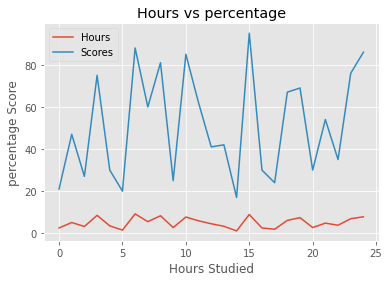

In [12]:
#visualizing with line plot

plt.style.use('ggplot')
df.plot(kind='line')
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('percentage Score')
plt.show()

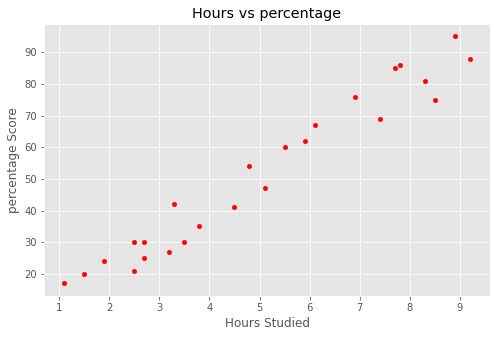

In [13]:
#Visualizing with scatter plot

df.plot(kind='scatter',x='Hours', y='Scores', color='r', figsize=(8,5))
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('percentage Score')
plt.show()

using linear regression we can solve this problem

# Modeling the data

In [17]:
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df[['Scores']])

#using train split,split the data and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2, random_state=2)

regression = LinearRegression()
regression.fit(train_x,train_y)

print('training Completed\n')
print('coefficients:', regression.coef_)
print('Intercept:', regression.intercept_)

training Completed

coefficients: [[9.94061514]]
Intercept: [1.50791048]


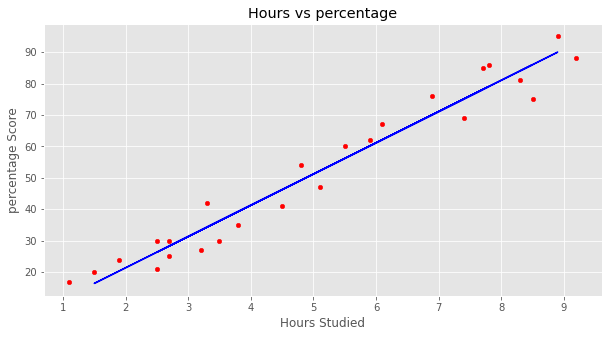

In [18]:
#we can also plot the fit line over the data in single linear regression

df.plot(kind='scatter', x='Hours', y='Scores', figsize=(10,5), color='r')
plt.plot(train_x, regression.coef_[0]*train_x + regression.intercept_, color='b')
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('percentage Score')
plt.show()

the blue line is the best fit line for this data

# Evaluation of the data

In [20]:
#using matrics to find mean absolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regression.predict(test_x)
print("Mean absolute error : {}" .format(metrics.mean_absolute_error(y_pred,test_y)))
print("r2-score: %.2f" % r2_score(y_pred, test_y))

Mean absolute error : 4.877039354964484
r2-score: 0.98


# Predicting the score with the single input value

In [28]:
hours=9.25
predicted_score=regression.predict([[hours]])

print(f'No. of Hours = {hours}')
print(f'predicted Score = {predicted_score[0]}')

No. of Hours = 9.25
predicted Score = [93.45860056]
